In [1]:
import pandas as pd
import numpy as np

In [2]:
sqrls = pd.read_csv('dataframes/bfsqrls.csv')

In [3]:
sqrls = sqrls.drop(columns='Unnamed: 0')

In [4]:
indifferent = sqrls[['indifferent', 'nearwater', 'neargrass']]
grouped = indifferent.groupby(indifferent['indifferent']).sum()
grouped

,nearwater,neargrass
indifferent,,
0,241,406
1,296,316


In [14]:
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
grouped

,nearwater,neargrass
indifferent,,
0,0.44879,0.562327
1,0.55121,0.437673


In [13]:
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])
observed_stat

0.11353729811149454

In [16]:
shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
shuffled_df

,indifferent,nearwater,neargrass,shuffled indifferent
0,0,True,False,0
1,0,False,True,0
2,0,False,True,1
3,0,True,False,0
4,0,True,False,0
...,...,...,...,...
1900,0,False,True,1
1901,1,True,False,1
1902,0,False,True,0
1903,1,False,False,1


In [17]:
shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
shuffled_grouped

,indifferent,nearwater,neargrass
shuffled indifferent,,,
0,0.520679,0.50838,0.484765
1,0.479321,0.49162,0.515235


In [19]:
shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
shuffled_stat

0.02361534533186832

In [20]:
stats = np.array([])

for i in range(100):
    shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
    shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

<AxesSubplot:ylabel='Frequency'>

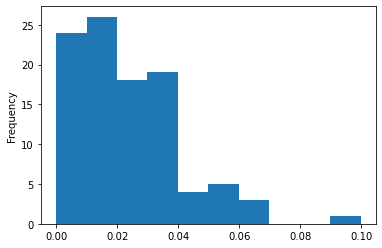

In [23]:
pd.Series(stats).plot(kind='hist')

In [24]:
np.mean(stats >= observed_stat)

0.0